In [2]:
# Import packages for the initial analysis
import pandas as pd # library providing high-performance, easy-to-use data structures and data analysis tools
import numpy as np # library for scientific computing in Python
import seaborn as sns # library for making statistical graphics in Python
import matplotlib.pyplot as plt # state-based interface to matplotlib

In [3]:
# Read the dataset into a dataframe
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Inspect the data types of the columns in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# The dependent variable is the 'SalePrice'

# '79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, 
# this challenge is to predict the final price of each home'

In [9]:
# Checking for missing values
df.isnull().sum().sum()

6965

In [ ]:
# Data Cleaning & Transformation
# Check each column with missing values and figure out how to deal with it.

In [11]:
# 1.LotFrontage - Linear feet of street connected to property
df['LotFrontage'].isnull().sum()

259

In [12]:
df['LotFrontage'].dtypes

dtype('float64')

In [13]:
df['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [14]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [15]:
df['LotFrontage'].median()

69.0

In [24]:
df['LotFrontage'].mode()

60.0

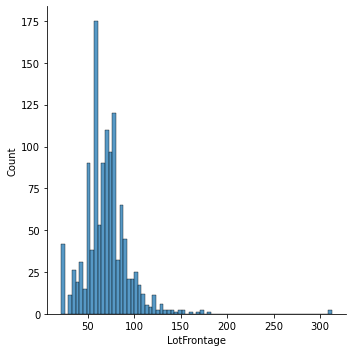

In [19]:
LotFrontage = df['LotFrontage']
sns.displot(data=df, x='LotFrontage')

In [25]:
# 18% of the data in LotFrontage is missing
# The median of the distribution is 69, mean is 70 and mode is 60
# I'll use the mode to fill the missing values because 60 appears over 175 times
df['LotFrontage'].fillna(df['LotFrontage'].mode()[0], inplace=True)

In [26]:
df['LotFrontage'].isnull().sum()

0

In [27]:
# 2.Alley - Type of alley access
df['Alley'].isnull().sum()

1369

In [28]:
df['Alley'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Alley, dtype: object

In [ ]:
# 94% percent of the data is missing 
# Does an alley access significantly influence sales price of a house in Iowa?
# Because of the significant number of missing values, I'll drop the column

In [29]:
df.drop(columns=['Alley'], axis=1, inplace=True)

In [39]:
# 3. MasVnrType - Masonry veneer type
df['MasVnrType'].isnull().value_counts()

False    1452
True        8
Name: MasVnrType, dtype: int64

In [33]:
df['MasVnrType'].head(10)

0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
5       None
6      Stone
7      Stone
8       None
9       None
Name: MasVnrType, dtype: object

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

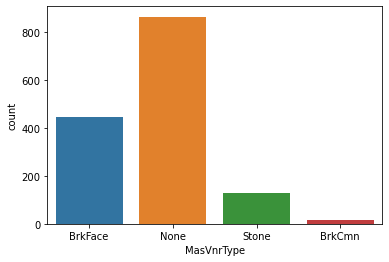

In [34]:
sns.countplot(x='MasVnrType', data=df)

In [40]:
df['MasVnrType'].mode()

'None'

In [41]:
# What is the probability that the MasVnr Type is None where 60% of the types in the distribution is None
# .60%
# I'll fill the missing 8 with the None type
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)

In [42]:
df['MasVnrType'].isnull().value_counts()

False    1460
Name: MasVnrType, dtype: int64

In [43]:
# 4. MasVnrArea - Masonry veneer area in square feet
df['MasVnrArea'].isnull().value_counts()

False    1452
True        8
Name: MasVnrArea, dtype: int64

In [44]:
df['MasVnrArea'].head()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

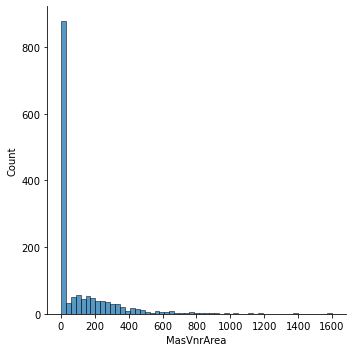

In [47]:
sns.displot(data=df, x='MasVnrArea')

In [48]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [49]:
df['MasVnrArea'].median()

0.0

In [50]:
# Just like MasVnrType, the MasVnrArea has 8 missing values. 
# The highest occurring value is 0.0(60%).
# I use the mode to fill the missing values
df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0], inplace=True)

In [51]:
df['MasVnrArea'].isnull().value_counts()

False    1460
Name: MasVnrArea, dtype: int64

In [52]:
# 5. BsmtQual - Height of the basement
df['BsmtQual'].isnull().value_counts()

False    1423
True       37
Name: BsmtQual, dtype: int64

In [54]:
df['BsmtQual'].head(10)

0    Gd
1    Gd
2    Gd
3    TA
4    Gd
5    Gd
6    Ex
7    Gd
8    TA
9    TA
Name: BsmtQual, dtype: object

In [ ]:
# The Basement is categorized.
# Ex	Excellent (100+ inches)	
# Gd	Good (90-99 inches)
# TA	Typical (80-89 inches)
# Fa	Fair (70-79 inches)
# Po	Poor (<70 inches
# NA	No Basement 

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

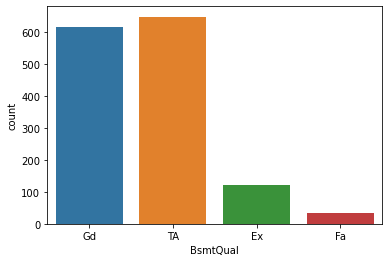

In [55]:
sns.countplot(x='BsmtQual', data=df)

In [ ]:
# From the visualization, the  Good (90-99 inches) and Typical (80-89 inches) basement qualities have the highest 
# occurence.
# So how do we deal with filling the missing values?

In [56]:
# I used the mode to fill the missing values
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)

In [57]:
df['BsmtQual'].isnull().value_counts()

False    1460
Name: BsmtQual, dtype: int64

In [58]:
# 6. BsmtCond - General condition of the basement
df['BsmtCond'].head()

0    TA
1    TA
2    TA
3    Gd
4    TA
Name: BsmtCond, dtype: object

In [59]:
df['BsmtCond'].isnull().value_counts()

False    1423
True       37
Name: BsmtCond, dtype: int64

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

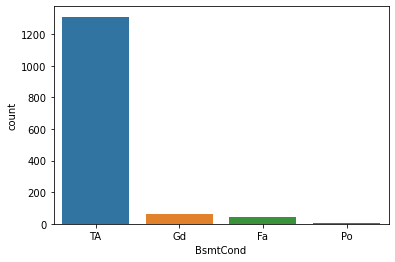

In [60]:
sns.countplot(x='BsmtCond', data=df)

In [61]:
# The missing values in BsmtCond accounts for 2.5% of the population
# The visualization of the distribution shows TA is highest occurring category.
# I'll fill the missing values with TA
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)

In [62]:
df['BsmtCond'].isnull().value_counts()

False    1460
Name: BsmtCond, dtype: int64

In [63]:
# 7. BsmtExposure - Walkout or garden level basement walls
df['BsmtExposure'].head()

0    No
1    Gd
2    Mn
3    No
4    Av
Name: BsmtExposure, dtype: object

In [ ]:
# BsmtExposure is a categorical data classified as the following:
# Gd	Good Exposure
# Av	Average Exposure (split levels or foyers typically score average or above)	
# Mn	Mimimum Exposure
# No	No Exposure
# NA	No Basement

In [64]:
df['BsmtExposure'].isnull().value_counts()

False    1422
True       38
Name: BsmtExposure, dtype: int64

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

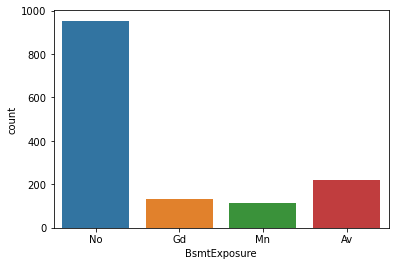

In [65]:
sns.countplot(x='BsmtExposure', data=df)

In [ ]:
# No Exposure takes over 60% of the whole category.
# That means No Exposure is the mode.
# Since No Exposure occurs the most, I will fill the missing 
#data using the mode.

In [66]:
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)

In [67]:
df['BsmtExposure'].isnull().value_counts()

False    1460
Name: BsmtExposure, dtype: int64

In [68]:
# 8. BsmtFinType1 - Rating of basement finished area
df['BsmtFinType1'].head()

0    GLQ
1    ALQ
2    GLQ
3    ALQ
4    GLQ
Name: BsmtFinType1, dtype: object

In [ ]:
# BsmtFinType1 is a categorical data. It classified into the following:
# GLQ	Good Living Quarters
# ALQ	Average Living Quarters
# BLQ	Below Average Living Quarters	
# Rec	Average Rec Room
# LwQ	Low Quality
# Unf	Unfinshed
# NA	No Basement

In [70]:
df['BsmtFinType1'].isnull().value_counts()

False    1423
True       37
Name: BsmtFinType1, dtype: int64

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

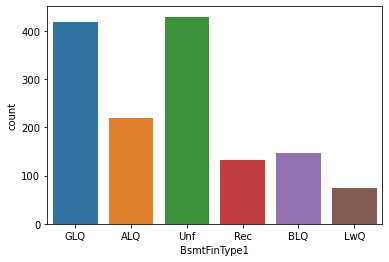

In [71]:
sns.countplot(x='BsmtFinType1', data=df)

In [72]:
# Unf Unfinished category is the value that appears most frequently
# The missing values make up 2.5% of the entire population of values
# I will fill the missing values with the mode
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)

In [73]:
df['BsmtFinType1'].isnull().value_counts()

False    1460
Name: BsmtFinType1, dtype: int64

In [74]:
# 9. BsmtFinType2 - Rating of basement finished area (if multiple types)
# This is a categorical data. It is classified by the following:
# GLQ	Good Living Quarters
# ALQ	Average Living Quarters
# BLQ	Below Average Living Quarters	
# Rec	Average Rec Room
# LwQ	Low Quality
# Unf	Unfinshed
# NA	No Basement
df['BsmtFinType2'].head()

0    Unf
1    Unf
2    Unf
3    Unf
4    Unf
Name: BsmtFinType2, dtype: object

In [75]:
df['BsmtFinType2'].isnull().value_counts()

False    1422
True       38
Name: BsmtFinType2, dtype: int64

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

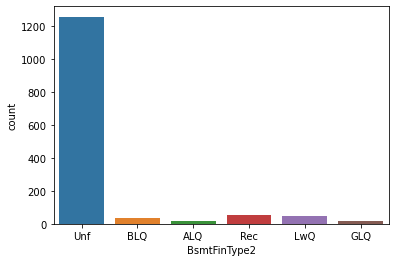

In [76]:
sns.countplot(x='BsmtFinType2', data=df)

In [77]:
# Over 88% of the categories in BsmtFinType2 fall under Unfinshed.
# The probability of the Unfinished category being picked at random is over 65%
# I'll use the mode to fill the missing values
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0],inplace=True)

In [79]:
df['BsmtFinType2'].isnull().value_counts()

False    1460
Name: BsmtFinType2, dtype: int64

In [80]:
# 10. Electrical - Electrical system
df['Electrical'].head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

In [81]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
# Electrical is categorical data. It is classified by the following;
# SBrkr	Standard Circuit Breakers & Romex
# FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
# FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
# FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
# Mix	Mixed

<AxesSubplot:xlabel='Electrical', ylabel='count'>

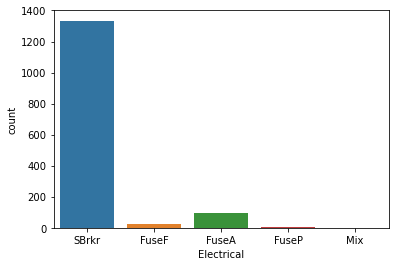

In [82]:
sns.countplot(x='Electrical', data=df)

In [83]:
df['Electrical'].isnull().value_counts()

False    1459
True        1
Name: Electrical, dtype: int64

In [84]:
# SBrkr	Standard Circuit Breakers & Romex make up 91% of the values in the Electrical column
# There's just a missing value.
# I'll fill the missing value with SBrkr
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [85]:
df['Electrical'].isnull().value_counts()

False    1460
Name: Electrical, dtype: int64

In [86]:
# 11. FireplaceQu - Fireplace quality
df['FireplaceQu'].head()

0    NaN
1     TA
2     TA
3     Gd
4     TA
Name: FireplaceQu, dtype: object

In [ ]:
# FireplaceQu is a categorical with the following classes;
# Ex	Excellent - Exceptional Masonry Fireplace
# Gd	Good - Masonry Fireplace in main level
# TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
# Fa	Fair - Prefabricated Fireplace in basement
# Po	Poor - Ben Franklin Stove
# NA	No Fireplace

In [87]:
df['FireplaceQu'].isnull().value_counts()

False    770
True     690
Name: FireplaceQu, dtype: int64

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

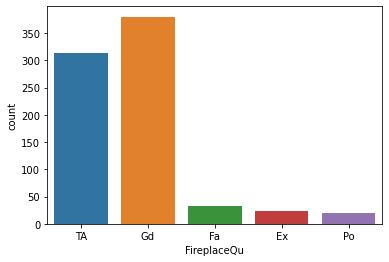

In [88]:
sns.countplot(x='FireplaceQu', data=)

In [89]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [90]:
# 47% of the data are missing values
# 47% of the values are either under the Good or Average class
# How do I fill the missing values?
# I'll use the mode for the first iteration.
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)

In [91]:
df['FireplaceQu'].isnull().value_counts()

False    1460
Name: FireplaceQu, dtype: int64

In [92]:
# 12. GarageType - Garage location
df['GarageType'].head()

0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object

In [93]:
df['GarageType'].isnull().value_counts()

False    1379
True       81
Name: GarageType, dtype: int64

In [ ]:
# 5.5% of the data in this column is missing

In [94]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='count'>

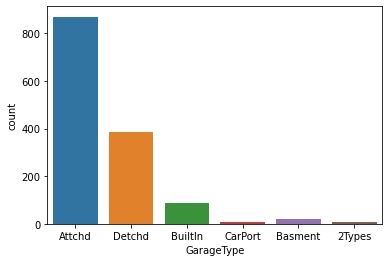

In [95]:
sns.countplot(x='GarageType', data=df)

In [96]:
# Attchd makes 60% of the population values in GarageType.
# What are the chances of 5.5% of the missing values being Attchd?
# Again, I'll use the mode to fill the missing values
df['GarageType'].fillna(df['GarageType'].mode()[0],inplace=True)

In [97]:
df['GarageType'].isnull().value_counts()

False    1460
Name: GarageType, dtype: int64

In [98]:
# 13. GarageYrBlt - Year garage was built
df['GarageYrBlt'].head()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [99]:
df['GarageYrBlt'].isnull().value_counts()

False    1379
True       81
Name: GarageYrBlt, dtype: int64

<AxesSubplot:xlabel='GarageYrBlt', ylabel='count'>

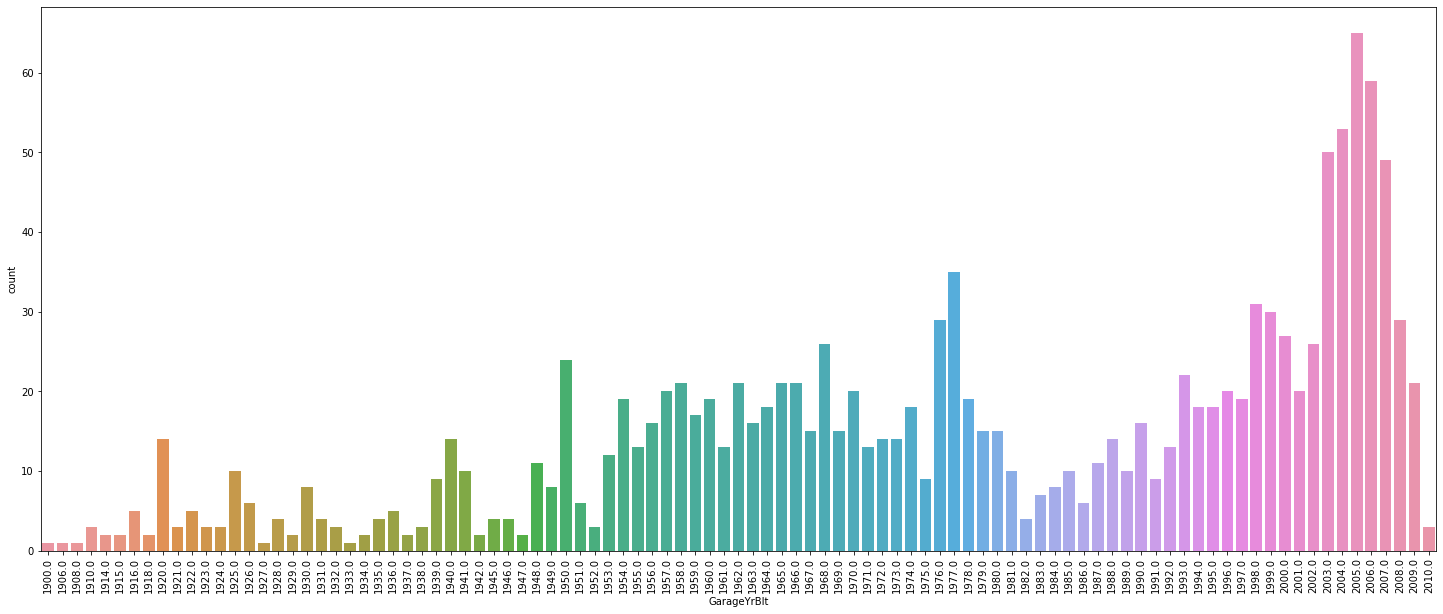

In [112]:
plt.subplots(figsize=(25, 10))
plt.xticks(rotation=90)
sns.countplot(x='GarageYrBlt', data=df)

In [117]:
# Let's find the mean, median & mode
df['GarageYrBlt'].mean(), df['GarageYrBlt'].median(), df['GarageYrBlt'].mode()[0]

(1978.5061638868744, 1980.0, 2005.0)

In [130]:
# 5.5% of the GarageYrBlt is missing
# The mean year makes for appr. 1.2% of the N population
# The median year makes for appr. 1% of the N population
# The mode year makes for appr. 4.5% of the N population
# I'll fill the missing values with the mode
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace=True)

In [131]:
df['GarageYrBlt'].isnull().value_counts()

False    1460
Name: GarageYrBlt, dtype: int64

In [132]:
# 14. GarageFinish - Interior finish of the garage
df['GarageFinish'].head()

0    RFn
1    RFn
2    RFn
3    Unf
4    RFn
Name: GarageFinish, dtype: object

In [ ]:
# GarageFinish is categorised into the following;
# Fin	Finished
# RFn	Rough Finished	
# Unf	Unfinished
# NA	No Garage

In [134]:
df['GarageFinish'].isnull().value_counts()

False    1379
True       81
Name: GarageFinish, dtype: int64

In [135]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [136]:
# Missing values makes for appr. 5.4% of the N population
# Unfinished = 41%
# Rough Finished = 29%
# Finished = 24%
# Fill missing vales with Unfinished
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)

In [137]:
df['GarageFinish'].isnull().value_counts()

False    1460
Name: GarageFinish, dtype: int64

In [138]:
# 15. GarageQual: Garage quality
df['GarageQual'].head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageQual, dtype: object

In [ ]:
# GarageQual is categorised into the following;
# Ex	Excellent
# Gd	Good
# TA	Typical/Average
# Fa	Fair
# Po	Poor
# NA	No Garage

In [139]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [140]:
df['GarageQual'].isnull().value_counts()

False    1379
True       81
Name: GarageQual, dtype: int64

In [141]:
# Typical/Average = 94% of the values
# What are the chances that 1.2%(missing values) fall under Typical/Average?
# I'll use the mode(TA) to fill the missing values
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)

In [142]:
df['GarageQual'].isnull().value_counts()

False    1460
Name: GarageQual, dtype: int64

In [143]:
# 16. GarageCond: Garage condition
df['GarageCond'].head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageCond, dtype: object

In [144]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [145]:
df['GarageCond'].isnull().value_counts()

False    1379
True       81
Name: GarageCond, dtype: int64

In [146]:
# I'll use the mode to fill the missing values
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)

In [147]:
df['GarageCond'].isnull().value_counts()

False    1460
Name: GarageCond, dtype: int64

In [148]:
# 17. PoolQC: Pool quality
df['PoolQC'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PoolQC, dtype: object

In [149]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [150]:
df['PoolQC'].isnull().value_counts()

True     1453
False       7
Name: PoolQC, dtype: int64

In [152]:
# PoolQC is categorised into;
# Ex	Excellent
# Gd	Good
# TA	Average/Typical
# Fa	Fair
# NA	No Pool

# However, 99% of the column has missing values😕
# Ofcourse, not all houses have swimming pools
# Could it be that Iowa's weather does not encourage having swimming pools?
# I'll create a new category(NA), convert the NaN to NA and fill the new category with the NA

In [166]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [184]:
na = 'NA'

In [187]:
df['PoolQC'].fillna(na, inplace=True)

In [188]:
df['PoolQC'].value_counts()

NA    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

In [189]:
df['PoolQC'].isnull().value_counts()

False    1460
Name: PoolQC, dtype: int64

In [190]:
# 18. Fence: Fence quality
df['Fence'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Fence, dtype: object

In [ ]:
# Fence is categorised into;
# GdPrv	Good Privacy
# MnPrv Minimum Privacy
# GdWo  Good Wood
# MnWw	Minimum Wood/Wire
# NA	No Fence

In [191]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [192]:
df['Fence'].isnull().value_counts()

True     1179
False     281
Name: Fence, dtype: int64

In [193]:
# 81% of the data are missing values
# Let's assume(for now) that the missing values means No Fences
df['Fence'].fillna(na, inplace=True)

In [194]:
df['Fence'].isnull().value_counts()

False    1460
Name: Fence, dtype: int64

In [195]:
# 19. MiscFeature: Miscellaneous feature not covered in other categories
df['MiscFeature'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: MiscFeature, dtype: object

In [196]:
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [ ]:
# MiscFeature is categorised into;
# Elev	Elevator
# Gar2	2nd Garage (if not described in garage section)
# Othr	Other
# Shed	Shed (over 100 SF)
# TenC	Tennis Court
# NA	None

In [198]:
df['MiscFeature'].isnull().value_counts()

True     1406
False      54
Name: MiscFeature, dtype: int64

In [199]:
# 99% are missing values
# Let's assume(for now) that None of these feature exist. Hence, None.
df['MiscFeature'].fillna(na, inplace=True)

In [200]:
df['MiscFeature'].isnull().value_counts()

False    1460
Name: MiscFeature, dtype: int64

In [201]:
# I am done with the first part of this analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil